In [68]:
#imports
#input
import matplotlib.pyplot as plt
import skimage
from skimage import io
from glob import glob

#image represenation
import numpy as np
from numpy import ma
import pandas as pd 

#image processing
from skimage import measure, filters, morphology, feature,segmentation, draw
from skimage.morphology import disk, square

#plotting
import seaborn as sns
import tabulate


In [69]:
radrat = 4

./tchakamau/Scans_of_balls\FG-w1x-01.21_001.csv ./tchakamau/Scans_of_balls\FG-w1x-01.21-_001_C.tif
./tchakamau/Scans_of_balls\FG-w1x-01.21_002.csv ./tchakamau/Scans_of_balls\FG-w1x-01.21-_002_C.tif
./tchakamau/Scans_of_balls\FG-w1x-01.21_003.csv ./tchakamau/Scans_of_balls\FG-w1x-01.21-_003_C.tif
./tchakamau/Scans_of_balls\FG-w1x-01.21_004.csv ./tchakamau/Scans_of_balls\FG-w1x-01.21-_004_C.tif
./tchakamau/Scans_of_balls\FG-w1x-01.21_005.csv ./tchakamau/Scans_of_balls\FG-w1x-01.21-_005_C.tif
./tchakamau/Scans_of_balls\FG-w1x-01.21_006.csv ./tchakamau/Scans_of_balls\FG-w1x-01.21-_006_C.tif
./tchakamau/Scans_of_balls\FG-w1x-01.21_007.csv ./tchakamau/Scans_of_balls\FG-w1x-01.21-_007_C.tif
./tchakamau/Scans_of_balls\FG-w1x-01.21_008.csv ./tchakamau/Scans_of_balls\FG-w1x-01.21-_008_C.tif
[            1           2           3           4           5           6     \
0     324.586639  324.215242  337.671239  327.286409  322.472533  334.485796   
1     334.128684  332.614527  333.128769  340.6

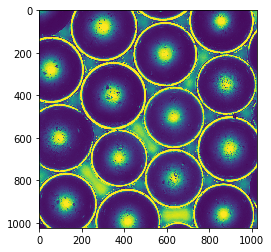

In [70]:
filenames = glob('./tchakamau/Scans_of_balls/FG-w*.csv')
filenames2 = glob('./tchakamau/Scans_of_balls/FG*_*[1-9]*_C.tif')
[print(i, z) for i,z in zip(filenames, filenames2)]
tables = [pd.read_csv(filename, skiprows=19, header = None).iloc[:, 1:-1] for filename in filenames]
intensities = [io.imread(filename2, as_gray=True) for filename2 in filenames2]

print(tables, len(tables))
plt.imshow(intensities[1])

In [71]:
def vector_dist(a, b):
    sqdist = 0
    if len(a)==len(b):
        for x, y in zip(a, b):
            square = (x-y)*(x-y)
            sqdist += square
        return np.abs(np.around(np.sqrt(sqdist), 6))
    else:
        print("Error in distances")
        
print(vector_dist((0,3), (4, 0)))

def curve_heights(distance,radius):
    try:
        angle = np.arcsin(distance / radius)
        height = radius * np.cos(angle)
        return np.around(height, 6)
    except:
        print(distance, radius, "Could not compute angle")
    
print(curve_heights(0, 5), curve_heights(10, 10))

5.0
5.0 0.0


[[0.25021451 0.20563294 0.19552    ... 0.02352941 0.02381216 0.02606706]
 [0.3642698  0.30100314 0.28745804 ... 0.02381216 0.02381216 0.0240949 ]
 [0.24630706 0.34527137 0.26617333 ... 0.02381216 0.0240949  0.0240949 ]
 ...
 [0.74354353 0.75082902 0.77790706 ... 0.04707373 0.03782392 0.03923059]
 [0.76145412 0.75790627 0.73479098 ... 0.04061451 0.04315216 0.04034667]
 [0.78915725 0.8237098  0.80826078 ... 0.04258667 0.03725843 0.03894784]] 1024
2
[array([140, 140, 140, ..., 206, 206, 206], dtype=int64), array([834, 835, 836, ..., 845, 846, 847], dtype=int64)]
2
[array([143, 143, 143, ..., 202, 202, 202], dtype=int64), array([556, 557, 558, ..., 566, 567, 568], dtype=int64)]
2
[array([370, 370, 370, ..., 437, 437, 437], dtype=int64), array([384, 385, 386, ..., 392, 393, 394], dtype=int64)]
2
[array([391, 391, 391, ..., 457, 457, 457], dtype=int64), array([681, 682, 683, ..., 692, 693, 694], dtype=int64)]
2
[array([597, 597, 597, ..., 663, 663, 663], dtype=int64), array([189, 190, 191, .

'     #collect image from circle mask\n        circle = np.ones_like(image)\n        circle[coords] = 0\n        ball_cap = ma.masked_array(image, circle)\n        roughness = np.var(ball_cap)\n        mean = np.mean(ball_cap)\n        wroughs.append(roughness)\n        wmeans.append(mean)\n        ax[0][ind].imshow(ball_cap)\n        ax[1][ind].imshow(normal_cap)\n        ind +=1\n    #show subtraction fo that fom the cap as wll a the cap\n    \n    \n    for radius, center in zip(radii, centers):\n        circle = np.ones_like(image)\n        coords=draw.circle(center[0], center[1], radius)\n        circle[coords]=0\n        ball_cap = ma.masked_array(image, circle)\n        roughness = np.var(ball_cap)\n        mean = np.mean(ball_cap)\n        wroughs.append(roughness)\n        wmeans.append(mean)\n        ax[ind].imshow(ball_cap)\n        ind +=1\n        '

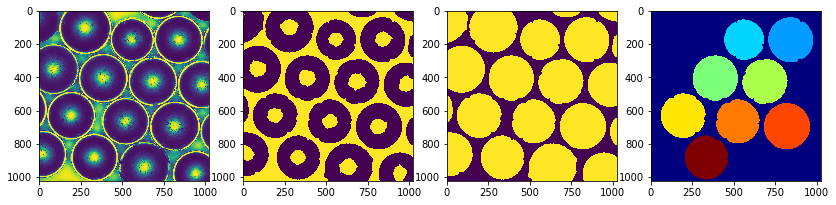

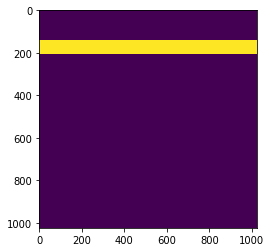

In [72]:
wroughs = []
wmeans = []

for table, intensity in zip(tables[0:2], intensities[0:1]):
    intense = np.ascontiguousarray(np.fliplr(np.rot90(intensity, k=3)))
    image = np.array(table)
    fig, ax = plt.subplots(ncols=4,figsize=(14, 10))
    ax[0].imshow(intense)
    print(intense, len(intense))
       
    bw_balls = intense  > filters.threshold_isodata(intense)
    inverse = morphology.closing(bw_balls, disk(20))
    filled_balls =np.invert(morphology.remove_small_objects(inverse,10000))#morphology.convex_hull_object(morphology.remove_small_objects(bw_balls, min_size=2000))
    labeled_balls = measure.label(filled_balls)
    inner_balls = segmentation.clear_border(labeled_balls)
    
    ax[1].imshow(inverse)
    ax[2].imshow(filled_balls)#(filled_balls)
    ax[3].imshow(inner_balls, cmap='jet')
    
    # collect radii in a list
    regions = measure.regionprops(inner_balls)
    centers = [x.centroid for x in regions]
    radii = [x.equivalent_diameter/2 for x in regions]
    radii = [x/radrat for x in radii] # use 1/radrat of a radius
    
    ##Plot image of the circular region for each ball collected, varying in intensity 
    #make function that takes centers and circles and makes the map
    #by making the circles and setting them to 1
    fig, ax = plt.subplots()#(ncols = len(regions), figsize=(14, 10))
    ind = 0
    blank = np.zeros_like(image)
    for center, radius in zip(centers, radii): # per ball
        coords = draw.circle(center[0], center[1], radius)
        print(len(coords))
        print(list(coords))
        #Set heights of circle mask 
        for row, column in zip(coords[0], coords[1]):
            #print(row, column)
            #print(center)
            distance= vector_dist((row, column), center)
            #print(distance)
            
             # value of image at that coord
            curve_height = curve_heights(distance, radius)
            blank[(row, column)] = curve_height #set the heights of the mask
    ax.imshow(blank)
"""     #collect image from circle mask
        circle = np.ones_like(image)
        circle[coords] = 0
        ball_cap = ma.masked_array(image, circle)
        roughness = np.var(ball_cap)
        mean = np.mean(ball_cap)
        wroughs.append(roughness)
        wmeans.append(mean)
        ax[0][ind].imshow(ball_cap)
        ax[1][ind].imshow(normal_cap)
        ind +=1
    #show subtraction fo that fom the cap as wll a the cap
    
    
    for radius, center in zip(radii, centers):
        circle = np.ones_like(image)
        coords=draw.circle(center[0], center[1], radius)
        circle[coords]=0
        ball_cap = ma.masked_array(image, circle)
        roughness = np.var(ball_cap)
        mean = np.mean(ball_cap)
        wroughs.append(roughness)
        wmeans.append(mean)
        ax[ind].imshow(ball_cap)
        ind +=1
        """
        

In [44]:
print(intensity)
c = (1, 1)
print(intensity[c])


[[0.25021451 0.3642698  0.24630706 ... 0.74354353 0.76145412 0.78915725]
 [0.20563294 0.30100314 0.34527137 ... 0.75082902 0.75790627 0.8237098 ]
 [0.19552    0.28745804 0.26617333 ... 0.77790706 0.73479098 0.80826078]
 ...
 [0.02352941 0.02381216 0.02381216 ... 0.04707373 0.04061451 0.04258667]
 [0.02381216 0.02381216 0.0240949  ... 0.03782392 0.04315216 0.03725843]
 [0.02606706 0.0240949  0.0240949  ... 0.03923059 0.04034667 0.03894784]]
0.30100313725490196


[] 0


Text(0.5, 0, "Mean value - 'Intensity'")

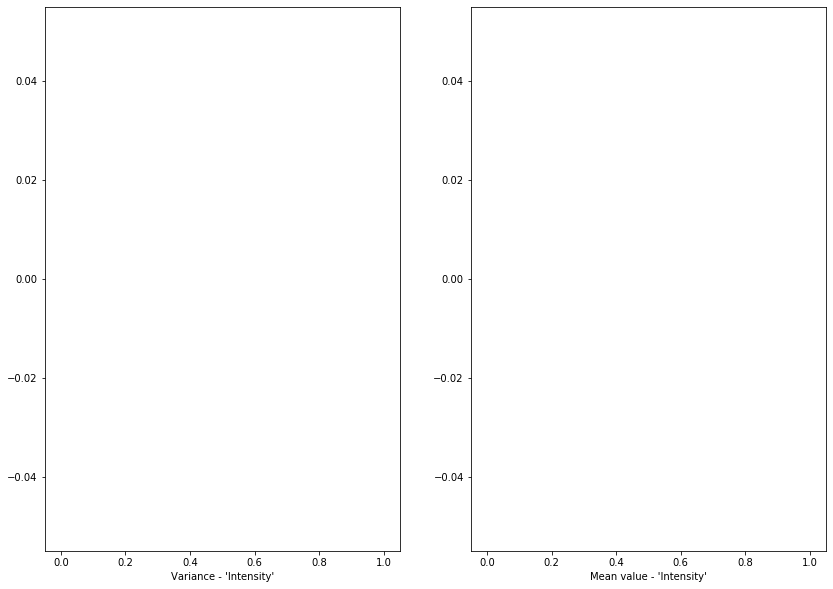

In [5]:
#Label, get_center, take from each center point, a radius of half the actual radius of that region, mask the array to exclude the rest
# for that blob, then get the average deviation of intensity for each of the remaining blob surfaces.
print(wroughs, len(wroughs))
fig, ax = plt.subplots(ncols=2, figsize=(14,10))
ax[0].hist(wroughs)
ax[0].set_xlabel("Variance - 'Intensity'")
ax[1].hist(wmeans)
ax[1].set_xlabel("Mean value - 'Intensity'")

In [6]:
filenames = glob('./tchakamau/Scans_of_balls/FG-S*.csv')
print(filenames)
tables = [pd.read_csv(filename, skiprows=19, header = None).iloc[:, 1:-1] for filename in filenames]

print(tables, len(tables))

['./tchakamau/Scans_of_balls\\FG-S-w0x-01.17_001.csv', './tchakamau/Scans_of_balls\\FG-S-w0x-01.17_002.csv', './tchakamau/Scans_of_balls\\FG-S-w0x-01.17_003.csv', './tchakamau/Scans_of_balls\\FG-S-w0x-01.17_004.csv', './tchakamau/Scans_of_balls\\FG-S-w0x-01.17_005.csv', './tchakamau/Scans_of_balls\\FG-S-w0x-01.17_006.csv', './tchakamau/Scans_of_balls\\FG-S-w0x-01.17_007.csv', './tchakamau/Scans_of_balls\\FG-S-w0x-01.17_008.csv', './tchakamau/Scans_of_balls\\FG-S-w0x-01.17_009.csv', './tchakamau/Scans_of_balls\\FG-S-w0x-01.17_010.csv']
[            1           2          3           4           5          6     \
0      67.369776   74.643921  48.680818   61.582434  112.981065  24.652158   
1     122.909074   91.846076  55.315478   74.180294   33.860746  18.049473   
2     126.282359   76.594351  16.994322   63.197135   48.409037  41.182853   
3      82.237809   61.118807  21.007092   12.693783   50.007750  21.342822   
4      28.393147   66.698317  57.345844   31.366754    7.274145  14.

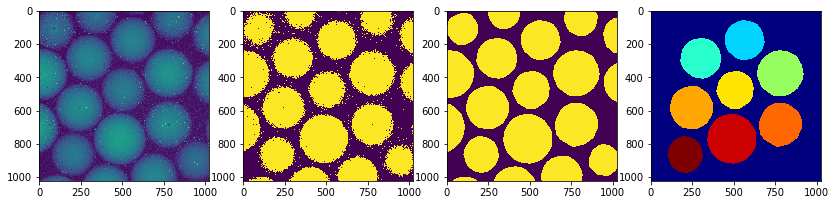

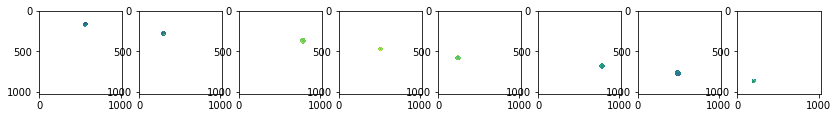

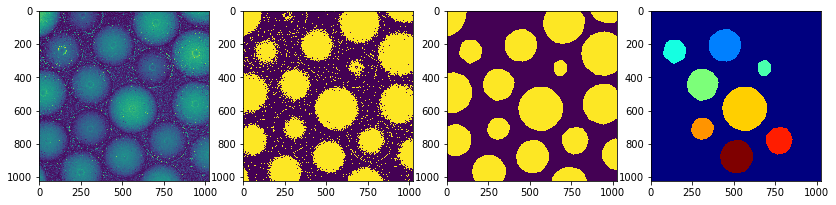

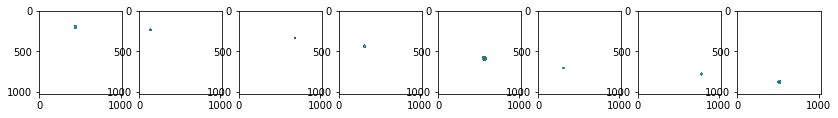

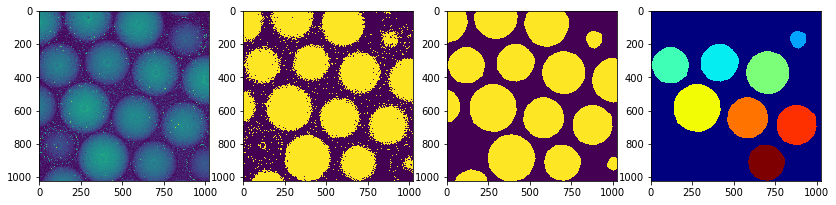

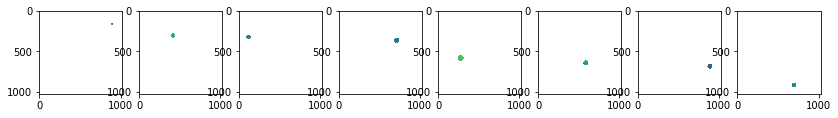

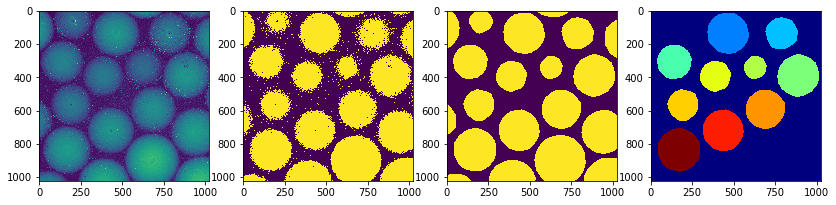

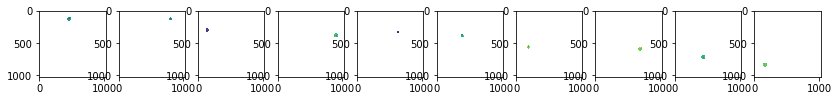

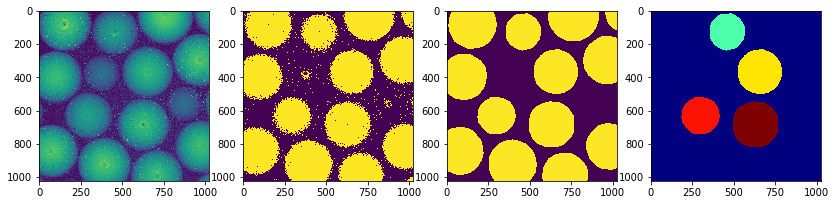

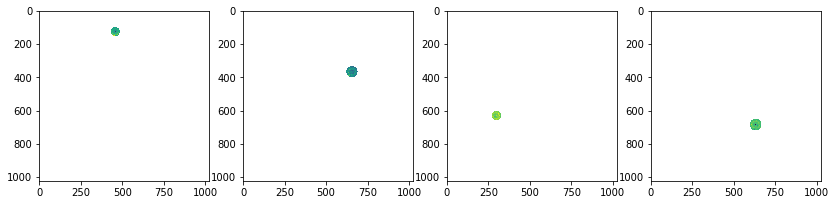

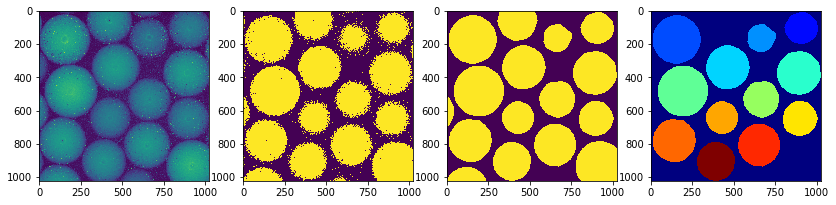

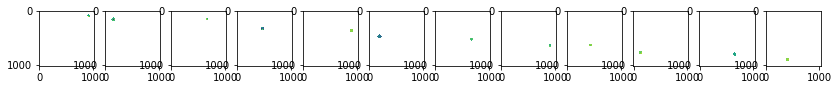

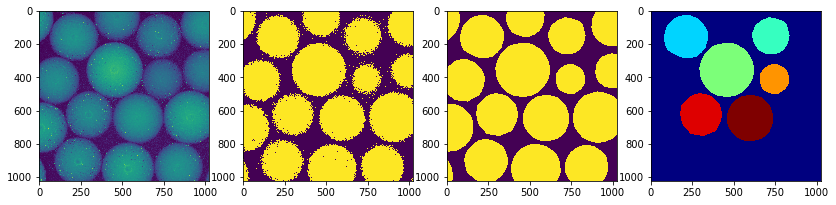

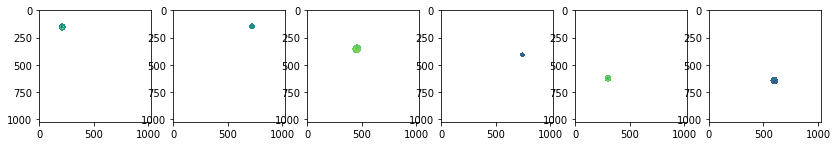

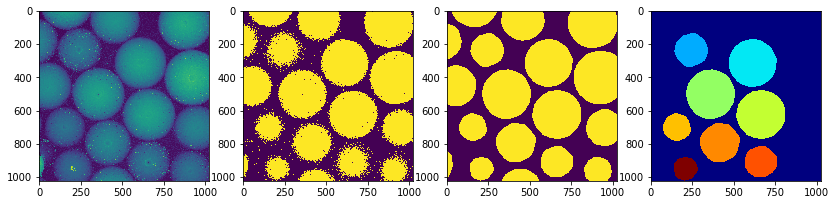

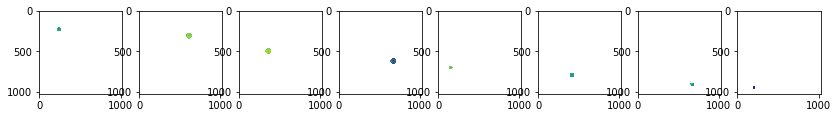

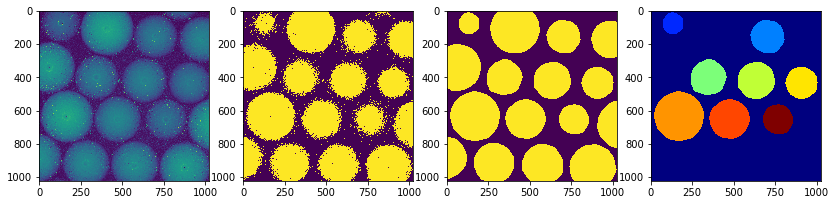

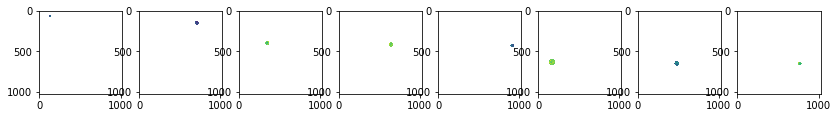

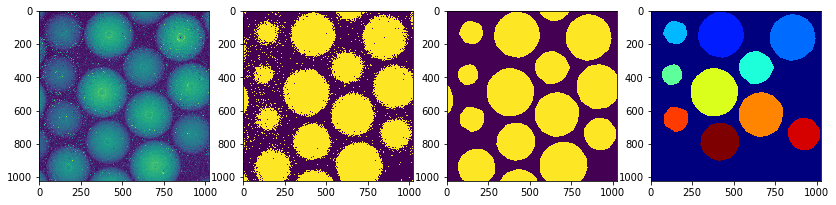

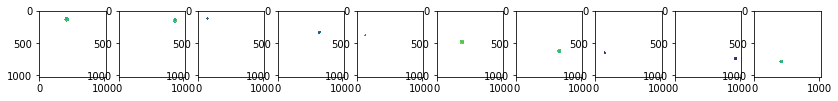

In [7]:
roughs = []
means = []

for table in tables:
    image = np.array(table)
    fig, ax = plt.subplots(ncols=4,figsize=(14, 10))
    ax[0].imshow(table)
    
    
    #balls = image#morphology.closing(image, disk(3))# 
    bw_balls = image  > filters.threshold_isodata(image)
    filled_balls = morphology.convex_hull_object(morphology.remove_small_objects(bw_balls, min_size=2000))
    labeled_balls = measure.label(filled_balls)
    inner_balls = segmentation.clear_border(labeled_balls)
    ax[1].imshow(bw_balls)
    ax[2].imshow(filled_balls)
    ax[3].imshow(inner_balls, cmap='jet')
    
    regions = measure.regionprops(inner_balls)
    centers = [x.centroid for x in regions]
    radii = [x.equivalent_diameter/2 for x in regions]
    radii = [x/radrat for x in radii] # use half a radius
    fig, ax = plt.subplots(ncols = len(regions), figsize=(14, 10))
    ind = 0
    for radius, center in zip(radii, centers):
        circle = np.ones_like(image)
        coords=draw.circle(center[0], center[1], radius)
        circle[coords]=0
        ball_cap = ma.masked_array(image, circle)
        roughness = np.var(ball_cap)
        mean = np.mean(ball_cap)
        roughs.append(roughness)
        means.append(mean)
        ax[ind].imshow(ball_cap)
        ind +=1
        

[92.4390849306434, 166.99313141145407, 508.90025806771473, 348.01790670996746, 159.7673986241863, 1627.218212003715, 98.69931340746838, 220.86875523775075, 308.8465957044745, 1869.729695002167, 359.6656471577619, 397.50450557906004, 168.54660743760616, 281.2345317718941, 407.9693846921676, 171.15179528176714, 592.4197421336975, 484.4084805084675, 482.1734610959168, 339.49228014244596, 340.59383828887263, 143.72011365433735, 612.2236063164705, 315.9315149654239, 241.72028854809463, 4246.921231817304, 173.7093084380105, 197.7340712812749, 463.8665785817561, 176.1339901526527, 489.1062389916039, 296.06751778417197, 776.3370732801889, 198.87105959683151, 1851.7538360438507, 228.22351038625004, 313.03226475965107, 799.5681527292461, 543.5748299745974, 984.2657070667913, 1443.117198087286, 167.25135510886506, 313.9274344497365, 179.48162499698753, 539.0410927653247, 524.028234723225, 221.26487064960486, 284.1466702420121, 510.5501935083835, 358.5033990458345, 169.9918161872958, 738.307344732

Text(0.5, 0, "Mean value of intensity'")

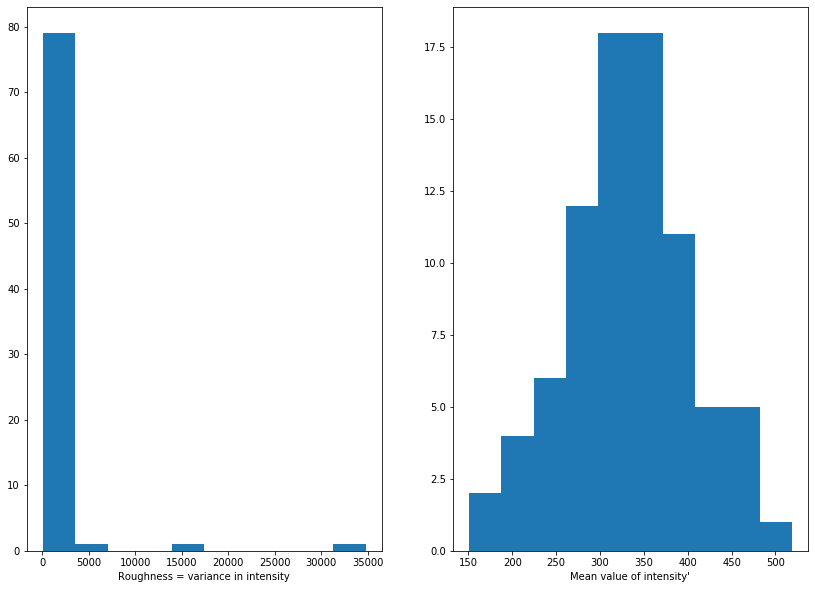

In [8]:
#Label, get_center, take from each center point, a radius of half the actual radius of that region, mask the array to exclude the rest
# for that blob, then get the average deviation of intensity for each of the remaining blob surfaces.
print(roughs, len(roughs))
fig, ax = plt.subplots(ncols=2, figsize=(14,10))
ax[0].hist(roughs)
ax[0].set_xlabel("Roughness = variance in intensity")
ax[1].hist(means)
ax[1].set_xlabel("Mean value of intensity'")

Text(0, 0.5, 'Frequency')

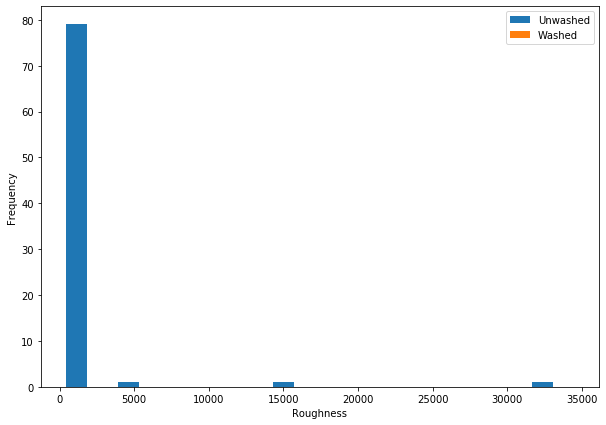

In [9]:
fig, ax = plt.subplots(figsize=(10,7))
ax.hist((roughs, wroughs), label = ("Unwashed", "Washed"))
ax.legend(prop={'size': 10})
ax.set_xlabel("Roughness")
ax.set_ylabel("Frequency")